# **Homework 1 - task 28**
The main goal of this homework is to transform existing evaluation datasets into a format suitable for evaluating the linguistic skills of Large Language Models (LLMs) by reframing tasks as multi-choice Question Answering (QA) tasks, providing effective prompts, and generating distractors where necessary, all formatted in JSON Lines standard for submission.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# **1. Data Loading:**


First we need to download the datasets from evalita to our python eviroment



In [2]:
##### Data Reader -- English/French/Italian
!git clone https://github.com/shammur/SemEval2022Task3.git
%cd ./SemEval2022Task3/
#data/train/train_subtask-2/
!ls

c:\Users\35193\Desktop\Sapienza\1 year\Second Semester\Multilingual Natural Language Processing\Homework 1\GitHub\NLP_Sapienza\Task_28\Subtask_2\SemEval2022Task3


fatal: destination path 'SemEval2022Task3' already exists and is not an empty directory.
'ls' is not recognized as an internal or external command,
operable program or batch file.


# Sub Task 2

**Regression sub-task**, which consists in predicting the average score assigned by human annotators on a seven point Likert-scale with respect to the subset of data evaluated via crowdsourcing.

## 1.1 visualize initial data

**dev.xml** is the training (development) dataset.


**test_gold.xml** is the test dataset.

In [3]:
import os

# Change the working directory
os.chdir(r'c:\Users\35193\Desktop\Sapienza\1 year\Second Semester\Multilingual Natural Language Processing\Homework 1\GitHub\NLP_Sapienza\Task_28\Subtask_2')

# Verify the current working directory
print("Current working directory:", os.getcwd())



Current working directory: c:\Users\35193\Desktop\Sapienza\1 year\Second Semester\Multilingual Natural Language Processing\Homework 1\GitHub\NLP_Sapienza\Task_28\Subtask_2


In [4]:
def visualize_original_data(file_path):
    try:
        with open(file_path, 'r') as file:
            for i in range(5):  
                line = file.readline()
                print(line.rstrip())
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Check test data
file_path = r'SemEval2022Task3\data\test\official_test_set_with_labels\subtask-2\It-Subtask2-scores.tsv'
visualize_original_data(file_path)


ID	Construction	Sentence	Scores
it_0	ingeneral	Amo gli arbusti, e le querce in generale.	2.91
it_1	particular	Amo le montagne, e in particolare i centri commerciali.	1.3
it_2	comparatives	Amo le foreste piÃ¹ delle case.	5.92
it_3	andtoo	Amo le foreste, ed anche i centri commerciali.	5.6


In [5]:
file_path = r'SemEval2022Task3\data\train\train_subtask-2\it\It-Subtask2-fold_0.tsv'
visualize_original_data(file_path)

ID	Sentence	Score
73	Adoro gli abeti, ma non i cespugli.	4.33
106	Adoro il vitello, ma non i granchi.	3.33
203	Adoro gli animali, un tipo interessante di abete.	1.25
466	Amo gli abeti piÃ¹ dei cespugli.	5.18


In [6]:
file_path = r'SemEval2022Task3\data\train\train_subtask-2\it\It-Subtask2-fold_1.tsv'
visualize_original_data(file_path)
# Not the same format and only one sentence so I will only use fold 0 for this dataset

[
  {
    "id": 523,
    "text": "Amo le ostriche, ed anche il tacchino.",
    "choices": [


# **Homework 1 - task 28**
The main goal of this homework is to transform existing evaluation datasets into a format suitable for evaluating the linguistic skills of Large Language Models (LLMs) by reframing tasks as multi-choice Question Answering (QA) tasks, providing effective prompts, and generating distractors where necessary, all formatted in JSON Lines standard for submission.

## 1.2 Data Reframing:
  First we need to change the type of the file from xml to json. Then we want to convert that json into the following format:
```JSON
{
    "id":       int,
    "text":     str,
    "choices":  list[str|int],
    "label":    int
}
```

In [7]:
import csv
import json

def tsv_to_jsonl(input_file, output_file):
    with open(input_file, 'r', newline='') as tsvfile:
        reader = csv.DictReader(tsvfile, delimiter='\t')
        with open(output_file, 'w') as jsonlfile:
            for row in reader:
                json.dump(row, jsonlfile)
                jsonlfile.write('\n')

tsv_file = r'SemEval2022Task3\data\test\official_test_set_with_labels\subtask-2\It-Subtask2-scores.tsv'
jsonl_file = 'It-Subtask2-test.jsonl'
tsv_to_jsonl(tsv_file, jsonl_file)


In [8]:
file1 = r'SemEval2022Task3\data\train\train_subtask-2\it\It-Subtask2-fold_0.tsv'
jsonl_file1 = 'It-Subtask2-fold_0.jsonl'
tsv_to_jsonl(file1, jsonl_file1)

- Join the 2 jsonl file in order to have a unique training dataset

In [9]:
# join the fold training data to a single file

def join_jsonl_files(file_paths, output_file):
    with open(output_file, 'w') as outfile:
        for file_path in file_paths:
            with open(file_path, 'r') as infile:
                for line in infile:
                    outfile.write(line)

file1 = r'It-Subtask2-fold_0.jsonl'
file2 = r'It-Subtask2-fold_1.jsonl'
output_file = 'It-Subtask2-train.jsonl'

join_jsonl_files([file1, file2], output_file)


## 1.3 Visualize jsonl information

In [10]:
import json

def visualize_data(jsonl_file):
    with open(jsonl_file, 'r') as f:
        line_count = 0
        for line in f:
            data = json.loads(line)
            print(data)
            line_count += 1
            if line_count == 5:
                break

json_file = 'It-Subtask2-test.jsonl'
visualize_data(json_file)


{'ID': 'it_0', 'Construction': 'ingeneral', 'Sentence': 'Amo gli arbusti, e le querce in generale.', 'Scores': '2.91'}
{'ID': 'it_1', 'Construction': 'particular', 'Sentence': 'Amo le montagne, e in particolare i centri commerciali.', 'Scores': '1.3'}
{'ID': 'it_2', 'Construction': 'comparatives', 'Sentence': 'Amo le foreste piÃ¹ delle case.', 'Scores': '5.92'}
{'ID': 'it_3', 'Construction': 'andtoo', 'Sentence': 'Amo le foreste, ed anche i centri commerciali.', 'Scores': '5.6'}
{'ID': 'it_4', 'Construction': 'ingeneral', 'Sentence': 'Amo i merli, e i gatti in generale.', 'Scores': '3.22'}


In [11]:
json_file = 'It-Subtask2-train.jsonl'
visualize_data(json_file)

{'ID': '73', 'Sentence': 'Adoro gli abeti, ma non i cespugli.', 'Score': '4.33'}
{'ID': '106', 'Sentence': 'Adoro il vitello, ma non i granchi.', 'Score': '3.33'}
{'ID': '203', 'Sentence': 'Adoro gli animali, un tipo interessante di abete.', 'Score': '1.25'}
{'ID': '466', 'Sentence': 'Amo gli abeti piÃ¹ dei cespugli.', 'Score': '5.18'}
{'ID': '137', 'Sentence': 'Amo i criceti, un tipo interessante di pappagallo.', 'Score': '1.36'}



## 1.4 Format jsonl

In order to get the json file with the desired format:

1. Rename ID to id and set it to be an increment int.
2. Rename Sentence to text. 
3. Add a choices key and within that 4 values: 1 the correct value in a random position and the others 3 set them as random values from 1 to 7 and different from each other and from the correct value.
4. Rename Labels to label (set value as the position of the correct choice).


In [12]:
import json
import random

def rearrange_json(input_file_path, output_file_path):
    id_counter = 0
    # Mapping scores to Italian descriptors used in Likert scales
    score_to_descriptor = {
        1: "Pessimo",
        2: "Scarso",
        3: "Sufficiente",
        4: "Buono",
        5: "Molto buono",
        6: "Ottimo",
        7: "Eccellente"
    }
    rearranged_data = []  # Initialize outside the loop
    with open(input_file_path, "r") as input_file:
        for line in input_file:
            data = json.loads(line)
            if 'ID' in data and 'Sentence' in data:
                score_key = 'Scores' if 'Scores' in data else 'Score'
                try:
                    score = int(round(float(data[score_key])))
                except ValueError:
                    print(f"Invalid score value")
                    continue
                new_pair = {
                    "id": id_counter,
                    #"id": int(pair['ID'].split('_')[-1]),  # Extracting the integer part of the ID
                    "text": data['Sentence'],
                    "choices": [],  
                    "label": None  
                }
                # Generating choices based on list of descriptors
                choices = [(score_to_descriptor[i], i) for i in range(1, 8) if i != score]
                # Ensure unique choices including the correct answer
                choices = random.sample(choices, 3)
                choices.append((score_to_descriptor[score], score))
                # Shuffle the choices to randomize the position of the correct answer
                random.shuffle(choices)
                new_pair["choices"] = choices
                # Generate label within the range of choices
                new_pair["label"] = [choice[1] for choice in new_pair["choices"]].index(score)
                rearranged_data.append(new_pair)
                id_counter += 1

    # Write rearranged data back to the file
    with open(output_file_path, "w") as output_file:
        for data_entry in rearranged_data:
            json.dump(data_entry, output_file)
            output_file.write('\n')

input_file_path = 'It-Subtask2-test.jsonl'
output_file_path = 'PreTENS-task2-test-data.jsonl'
rearrange_json(input_file_path, output_file_path)


input_file_path = 'It-Subtask2-train.jsonl'
output_file_path = 'PreTENS-task2-train-data.jsonl'
rearrange_json(input_file_path, output_file_path)


## 1.5 Visualize final jsonl

In [13]:
json_file = 'PreTENS-task2-test-data.jsonl'
visualize_data(json_file)

{'id': 0, 'text': 'Amo gli arbusti, e le querce in generale.', 'choices': [['Buono', 4], ['Molto buono', 5], ['Sufficiente', 3], ['Pessimo', 1]], 'label': 2}
{'id': 1, 'text': 'Amo le montagne, e in particolare i centri commerciali.', 'choices': [['Ottimo', 6], ['Molto buono', 5], ['Pessimo', 1], ['Sufficiente', 3]], 'label': 2}
{'id': 2, 'text': 'Amo le foreste piÃ¹ delle case.', 'choices': [['Pessimo', 1], ['Eccellente', 7], ['Scarso', 2], ['Ottimo', 6]], 'label': 3}
{'id': 3, 'text': 'Amo le foreste, ed anche i centri commerciali.', 'choices': [['Eccellente', 7], ['Molto buono', 5], ['Sufficiente', 3], ['Ottimo', 6]], 'label': 3}
{'id': 4, 'text': 'Amo i merli, e i gatti in generale.', 'choices': [['Buono', 4], ['Ottimo', 6], ['Eccellente', 7], ['Sufficiente', 3]], 'label': 3}


In [14]:
json_file = 'PreTENS-task2-train-data.jsonl'
visualize_data(json_file)


{'id': 0, 'text': 'Adoro gli abeti, ma non i cespugli.', 'choices': [['Scarso', 2], ['Molto buono', 5], ['Eccellente', 7], ['Buono', 4]], 'label': 3}
{'id': 1, 'text': 'Adoro il vitello, ma non i granchi.', 'choices': [['Ottimo', 6], ['Sufficiente', 3], ['Buono', 4], ['Scarso', 2]], 'label': 1}
{'id': 2, 'text': 'Adoro gli animali, un tipo interessante di abete.', 'choices': [['Pessimo', 1], ['Sufficiente', 3], ['Molto buono', 5], ['Scarso', 2]], 'label': 0}
{'id': 3, 'text': 'Amo gli abeti piÃ¹ dei cespugli.', 'choices': [['Molto buono', 5], ['Pessimo', 1], ['Sufficiente', 3], ['Scarso', 2]], 'label': 0}
{'id': 4, 'text': 'Amo i criceti, un tipo interessante di pappagallo.', 'choices': [['Eccellente', 7], ['Pessimo', 1], ['Ottimo', 6], ['Molto buono', 5]], 'label': 1}


## 1.6 Compare graphs of distribution of data
Allow to check in information was mantain after the Reframing of the data

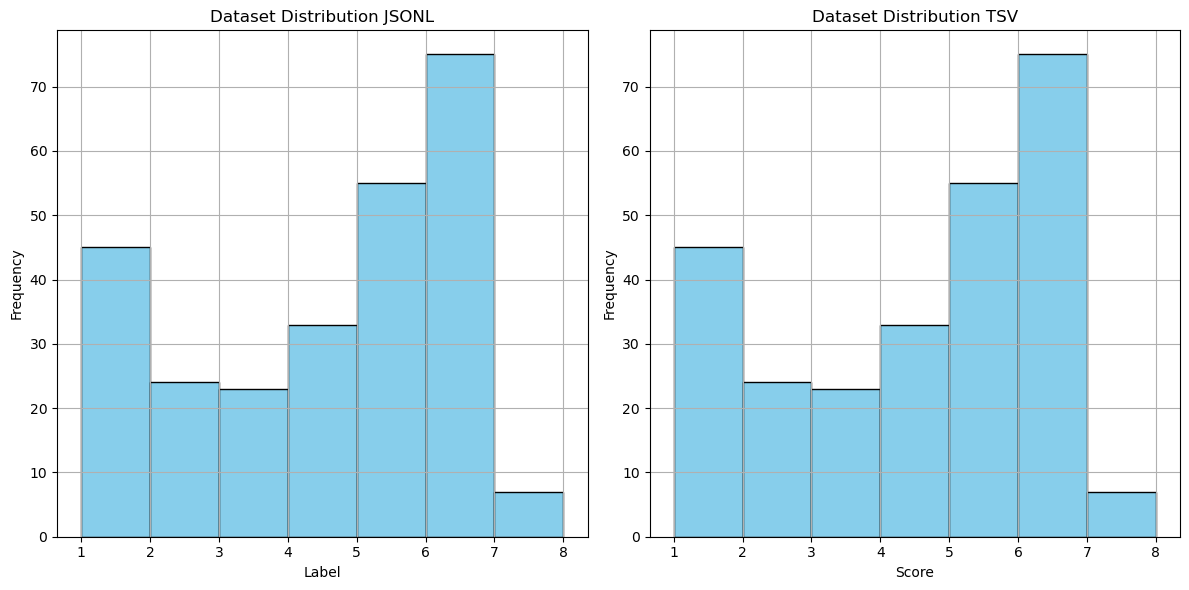

In [15]:
# Train data 
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

# Read JSONL file and extract labels
labels = []
with open("PreTENS-task2-train-data.jsonl", "r") as file:
    for line in file:
        data = json.loads(line)
        label = data['choices'][data['label']][1]
        labels.append(label)

# Clip labels between 1 and 7
clipped_labels = [max(1, min(label, 7)) for label in labels]

# Read the TSV data into a DataFrame
file_path = r"SemEval2022Task3\data\train\train_subtask-2\it\It-Subtask2-fold_0.tsv"
try:
    data = pd.read_csv(file_path, sep="\t")
except FileNotFoundError:
    print("File not found. Please check the file path:", file_path)
    exit()
except Exception as e:
    print("An error occurred while reading the file:", e)
    exit()

# Check if 'Score' column exists
if 'Score' not in data.columns:
    print("The 'Score' column does not exist in the DataFrame.")
    exit()

# Round the Scores to the nearest integer and clip between 1 and 7
data['Score'] = np.clip(np.round(data['Score']).astype(int), 1, 7)

# Plot both histograms side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of label distribution
axs[0].hist(clipped_labels, bins=range(1, 9), color='skyblue', edgecolor='black')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Dataset Distribution JSONL')
axs[0].set_xticks(range(1, 9))
axs[0].grid(True)

# Plot histogram of scores distribution
axs[1].hist(data['Score'], bins=range(1, 9), color='skyblue', edgecolor='black')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Dataset Distribution TSV')
axs[1].set_xticks(range(1, 9))
axs[1].grid(True)

plt.tight_layout()
plt.show()

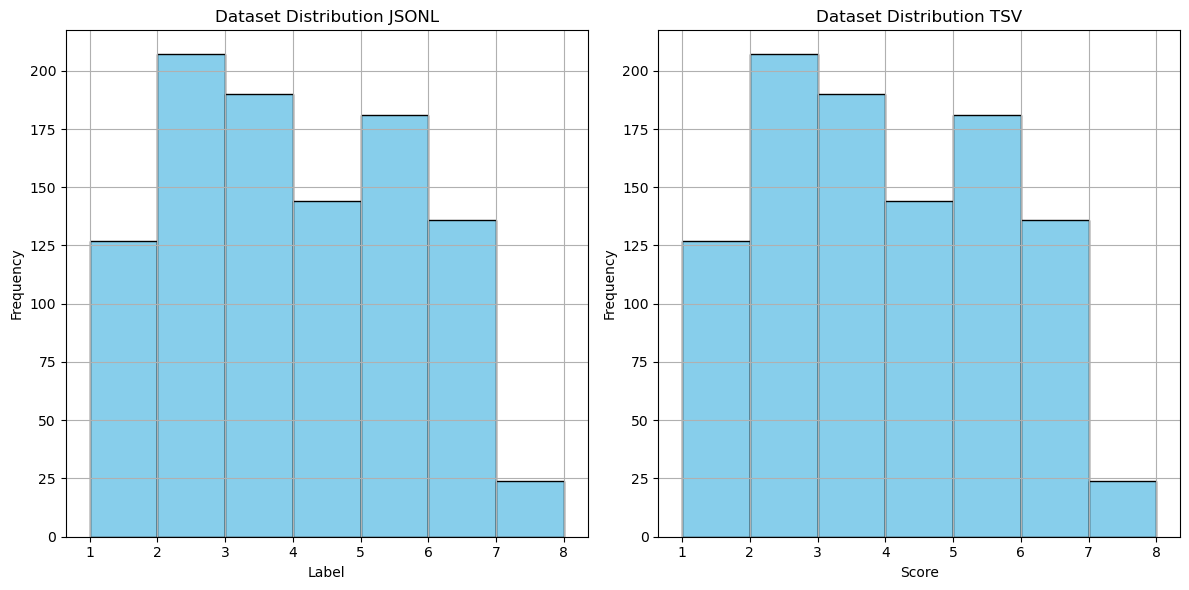

In [16]:
# Train data 
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

# Read JSONL file and extract labels
labels = []
with open("PreTENS-task2-test-data.jsonl", "r") as file:
    for line in file:
        data = json.loads(line)
        label = data['choices'][data['label']][1]
        labels.append(label)

# Clip labels between 1 and 7
clipped_labels = [max(1, min(label, 7)) for label in labels]

file_path = r"SemEval2022Task3\data\test\official_test_set_with_labels\subtask-2\It-Subtask2-scores.tsv"  # Update with your actual file path
try:
    data = pd.read_csv(file_path, sep="\t")
except FileNotFoundError:
    print("File not found. Please check the file path:", file_path)
    exit()
except Exception as e:
    print("An error occurred while reading the file:", e)
    exit()

# Check if 'Scores' column exists
if 'Scores' not in data.columns:
    print("The 'Scores' column does not exist in the DataFrame.")
    exit()

# Round the Scores to the nearest integer and clip between 1 and 7
data['Scores'] = np.clip(np.round(data['Scores']).astype(int), 1, 7)

# Plot both histograms side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of label distribution
axs[0].hist(clipped_labels, bins=range(1, 9), color='skyblue', edgecolor='black')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Dataset Distribution JSONL')
axs[0].set_xticks(range(1, 9))
axs[0].grid(True)

# Plot histogram of scores distribution
axs[1].hist(data['Scores'], bins=range(1, 9), color='skyblue', edgecolor='black')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Dataset Distribution TSV')
axs[1].set_xticks(range(1, 9))
axs[1].grid(True)

plt.tight_layout()
plt.show()

## **2. Promt formulation**

In order to use this dataset we need to generate three prompts that can be used to get if a text is entailed to a hypothesis and then insert them into a json file. The three prompts are:

Here's the reformatted version:

**Template 1:**
Prompt: "Valuta l'accettabilità dell'affermazione {{text}} utilizzando la scala Likert fornita di seguito:
1 - Pessimo
2 - Scarso
3 - Sufficiente
4 - Buono
5 - Molto buono
6 - Ottimo
7 - Eccellente"

Translation: "Rate the acceptability of the statement "{text}" using the Likert scale provided below:
1 - Poor
2 - Fair
3 - Average
4 - Good
5 - Very Good
6 - Excellent
7 - Outstanding."

**Template 2:**
Prompt: "Considerando {{text}}, quanto lo trovi accettabile? Esprimi la tua valutazione su una scala da 1 a 7, dove '1' corrisponde a 'Pessimo' e '7' a 'Eccellente'."

Translation: "Considering {{text}}, how acceptable do you find it? Express your evaluation on a scale from 1 to 7, where '1' corresponds to 'Poor' and '7' to 'Excellent'."

**Template 3:**
Prompt: "Su una scala da 1 a 7, con '1' rappresentante 'Pessimo' e '7' 'Eccellente', quanto accettabile trovi {{text}}?"

Translation: "On a scale from 1 to 7, with '1' representing 'Poor' and '7' 'Excellent', how acceptable do you find {{text}}?"


In [17]:
import json

# Function to generate a JSON Lines file with a list of prompts
def generate_prompts(prompts, output_file):
    with open(output_file, 'w') as jsonl_file:
        for prompt in prompts:
            jsonl_file.write(json.dumps({"prompt": prompt}) + '\n')

    with open(output_file, 'r', encoding='utf-8') as jsonl_file:
        print(jsonl_file.read())


prompts = [
    "Valuta l'accettabilità dell'affermazione \{\{text\}\} utilizzando la scala Likert fornita di seguito: 1 - Pessimo,  2 - Scarso, 3 - Sufficiente, 4 - Buono, 5 - Molto buono, 6 - Ottimo, 7 - Eccellente.",
    "Considerando {{text}}, quanto lo trovi accettabile? Esprimi la tua valutazione su una scala da 1 a 7, dove '1' corrisponde a 'Pessimo' e '7' a 'Eccellente'.",
    "Su una scala da 1 a 7, con '1' rappresentante 'Pessimo' e '7' 'Eccellente', quanto accettabile trovi {{text}}?"
]

output_file = "PreTENS-task2-prompts.jsonl"
generate_prompts(prompts, output_file)
print(f"JSON file '{output_file}' generated successfully with {len(prompts)} prompts.")



{"prompt": "Valuta l'accettabilit\u00e0 dell'affermazione \\{\\{text\\}\\} utilizzando la scala Likert fornita di seguito: 1 - Pessimo,  2 - Scarso, 3 - Sufficiente, 4 - Buono, 5 - Molto buono, 6 - Ottimo, 7 - Eccellente."}
{"prompt": "Considerando {{text}}, quanto lo trovi accettabile? Esprimi la tua valutazione su una scala da 1 a 7, dove '1' corrisponde a 'Pessimo' e '7' a 'Eccellente'."}
{"prompt": "Su una scala da 1 a 7, con '1' rappresentante 'Pessimo' e '7' 'Eccellente', quanto accettabile trovi {{text}}?"}

JSON file 'PreTENS-task2-prompts.jsonl' generated successfully with 3 prompts.


# **3. Test if all the JSONL files are valid**

In [18]:
import json

def is_jsonl_valid(filename):
    try:
        with open(filename, 'r') as f:
            for line in f:
                json.loads(line)
    except ValueError as e:
        print(f"Invalid JSONL format: {e}")
        return False
    return True

In [19]:
filename = 'PreTENS-task2-train-data.jsonl' 
if is_jsonl_valid(filename):
    print("The JSONL file is valid.")
else:
    print("The JSONL file is not valid.")

The JSONL file is valid.


In [20]:
filename = 'PreTENS-task2-test-data.jsonl' 
if is_jsonl_valid(filename):
    print("The JSONL file is valid.")
else:
    print("The JSONL file is not valid.")

The JSONL file is valid.


In [21]:
filename = 'PreTENS-task2-prompts.jsonl' 
if is_jsonl_valid(filename):
    print("The JSONL file is valid.")
else:
    print("The JSONL file is not valid.")

The JSONL file is valid.


# **4. Test Prompts with dataset**

In [22]:
# Device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [23]:
# Configuration
runtimeFlag = device #Run on GPU (you can't run GPTQ on cpu)
cache_dir = None # by default, don't set a cache directory. This is automatically updated if you connect Google Drive.
scaling_factor = 1.0 # allows for a max sequence length of 16384*6 = 98304! Unfortunately, requires Colab Pro and a V100 or A100 to have sufficient RAM.

## 3.1 Install

In [24]:
!pip install -q -U transformers peft accelerate optimum

!pip install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu118/

Looking in indexes: https://pypi.org/simple, https://huggingface.github.io/autogptq-index/whl/cu118/


In [26]:
# https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

## 3.2 Load Model


In [27]:
import transformers
import torch
import json
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_id = "MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7"
tokenizer_llama = AutoTokenizer.from_pretrained(model_id)
model_llama = AutoModelForSequenceClassification.from_pretrained(model_id).to(device)

# **4. Evaluate Homework prompts**

## 4.1. Test response of Promtps

In [28]:
import json
import torch

def visualize_prompt_response(jsonl_file):
    # Load your JSON file and process each pair
    with open(jsonl_file, 'r') as file:
        count = 0  # Counter to track processed pairs
        for line in file:
            if count >= 5:  # Break the loop if 5 pairs have been processed
                break
            pair = json.loads(line)
            id = pair['id']
            text = pair['text']
            choices = pair['choices']
            label_index = int(pair['label'])  # Convert label_index to an integer
            label = choices[label_index]  # Get the actual label using label_index

            # Format the prompt with text and hypothesis
            prompt_formatted = f"Qual è il tuo giudizio sull'accettabilità di {text}, su una scala da 1 a 7? ('1' indica 'Pessimo' e '7' indica 'Eccellente')."

            # Assuming you have tokenizer_llama and model_llama defined elsewhere
            input = tokenizer_llama(prompt_formatted, return_tensors="pt").to(device)
            output = model_llama(**input)
            logits = output.logits[0].detach().cpu().numpy()

            # Obtain the predicted label directly from logits
            probabilities = torch.softmax(torch.tensor(logits), -1).detach().cpu().numpy()
            print(f"Probabilities: {probabilities}")
            prediction_index = 1 if probabilities[1] > probabilities[0] else 0
            prediction_label = choices[prediction_index]
            prediction_confidence = probabilities[prediction_index] * 100
            prediction = {"label": prediction_label, "confidence": round(prediction_confidence, 1)}

            # Compare prediction with actual label
            is_correct = prediction_label == label
            count += 1

            # Visualize the formatted prompt and the prediction details
            print(f"ID: {id}")
            print("Prompt:", prompt_formatted)
            print("Prediction:", prediction)
            print("Actual Label:", label)
            print("Correct Prediction:", is_correct)
            print()
        
jsonl_file = 'PreTENS-task2-test-data.jsonl'
visualize_prompt_response(jsonl_file)


Probabilities: [0.01952113 0.9744667  0.00601211]
ID: 0
Prompt: Qual è il tuo giudizio sull'accettabilità di Amo gli arbusti, e le querce in generale., su una scala da 1 a 7? ('1' indica 'Pessimo' e '7' indica 'Eccellente').
Prediction: {'label': ['Molto buono', 5], 'confidence': 97.4}
Actual Label: ['Sufficiente', 3]
Correct Prediction: False

Probabilities: [0.01955767 0.9729056  0.00753672]
ID: 1
Prompt: Qual è il tuo giudizio sull'accettabilità di Amo le montagne, e in particolare i centri commerciali., su una scala da 1 a 7? ('1' indica 'Pessimo' e '7' indica 'Eccellente').
Prediction: {'label': ['Molto buono', 5], 'confidence': 97.3}
Actual Label: ['Pessimo', 1]
Correct Prediction: False

Probabilities: [0.04176541 0.9499256  0.008309  ]
ID: 2
Prompt: Qual è il tuo giudizio sull'accettabilità di Amo le foreste piÃ¹ delle case., su una scala da 1 a 7? ('1' indica 'Pessimo' e '7' indica 'Eccellente').
Prediction: {'label': ['Eccellente', 7], 'confidence': 95.0}
Actual Label: ['Otti

## 4.2. Compare the diferent prompts

In [29]:
import json

total_correct = 0
total_pairs = 0

# Load the JSONL file and process each pair
with open("PreTENS-task2-test-data.jsonl", 'r') as file:
        for line in file:
            pair = json.loads(line)
            id = pair['id']
            text = pair['text']
            choices = pair['choices']
            label = int(pair['label']) 
        
            # Format the prompt with actual text and hypothesis
            prompt_formatted = f"Qual è il tuo giudizio sull'accettabilità di {text}, su una scala da 1 a 7? ('1' indica 'Pessimo' e '7' indica 'Eccellente')."

            input = tokenizer_llama(prompt_formatted, return_tensors="pt").to(device)
            output = model_llama(**input)
            logits = output.logits[0].detach().cpu().numpy()

            # Obtain the predicted label directly from logits
            probabilities = torch.softmax(torch.tensor(logits), -1).detach().cpu().numpy()
            prediction_index = 1 if probabilities[1] > probabilities[0] else 0
            prediction_label = choices[prediction_index]

            # Compare prediction with actual label
            is_correct = prediction_label == choices[label]

            # Accumulate statistics
            total_correct += is_correct
            total_pairs += 1

# Calculate overall statistics only if at least one pair was processed
if total_pairs > 0:
    accuracy = total_correct / total_pairs * 100

    # Print statistics
    print("Overall Statistics:")
    print("Total Pairs:", total_pairs)
    print("Total Correct:", total_correct)
    print("Accuracy:", round(accuracy, 2), "%")
else:
    print("No pairs found in the JSONL file.")


Overall Statistics:
Total Pairs: 1009
Total Correct: 254
Accuracy: 25.17 %


In [30]:
import json
import torch

def prompt_testing(prompt, input_file):
    total_correct = 0
    total_pairs = 0
    total_confidence = 0

    # Load the JSONL file and process each pair
    with open(input_file, 'r') as file:
        for line in file:
            pair = json.loads(line)
            id = pair['id']
            text = pair['text']
            choices = pair['choices']
            label = int(pair['label']) 
            
            # Format with text and hypothesis 
            prompt_formatted = prompt.replace('{{text}}', text)
            input = tokenizer_llama(prompt_formatted, return_tensors="pt").to(device)
            output = model_llama(**input)
            logits = output.logits[0].detach().cpu().numpy()

            # Obtain the predicted label directly from logits
            probabilities = torch.softmax(torch.tensor(logits), -1).detach().cpu().numpy()
            prediction_index = 1 if probabilities[1] > probabilities[0] else 0
            prediction_label = choices[prediction_index]

            # Compare prediction with actual label
            is_correct = prediction_label == choices[label]

            # Accumulate statistics
            total_correct += is_correct
            total_pairs += 1
            total_confidence += probabilities[prediction_index]

    # Calculate statistics 
    if total_pairs > 0:
        accuracy = total_correct / total_pairs * 100
        mean_confidence = total_confidence / total_pairs

        # Print statistics
        print("Total Pairs:", total_pairs)
        print("Total Correct:", total_correct)
        print("Accuracy:", round(accuracy, 2), "%")
        print("Mean Confidence:", round(mean_confidence, 2))
    else:
        print("No pairs found in the JSONL file.")

with open('PreTENS-task2-prompts.jsonl', 'r') as prompts_file:
    prompt_data = []
    for line in prompts_file:
        prompt_item = json.loads(line)
        prompt_data.append(prompt_item)

    for prompt_item in prompt_data:
        prompt = prompt_item["prompt"]
        print("\nPrompt:", prompt)
        file_path = 'PreTENS-task2-train-data.jsonl'
        prompt_testing(prompt, file_path)


Prompt: Valuta l'accettabilità dell'affermazione \{\{text\}\} utilizzando la scala Likert fornita di seguito: 1 - Pessimo,  2 - Scarso, 3 - Sufficiente, 4 - Buono, 5 - Molto buono, 6 - Ottimo, 7 - Eccellente.


Total Pairs: 262
Total Correct: 66
Accuracy: 25.19 %
Mean Confidence: 0.98

Prompt: Considerando {{text}}, quanto lo trovi accettabile? Esprimi la tua valutazione su una scala da 1 a 7, dove '1' corrisponde a 'Pessimo' e '7' a 'Eccellente'.
Total Pairs: 262
Total Correct: 66
Accuracy: 25.19 %
Mean Confidence: 0.98

Prompt: Su una scala da 1 a 7, con '1' rappresentante 'Pessimo' e '7' 'Eccellente', quanto accettabile trovi {{text}}?
Total Pairs: 262
Total Correct: 66
Accuracy: 25.19 %
Mean Confidence: 0.84


**Prompt:** Quanto ritieni accettabile {{text}}, su una scala da 1 a 7, dove 1 è "Pessimo" e 7 è "Eccellente"?

Total Pairs: 1009

Total Correct: 257

Accuracy: 25.47 %

Mean Confidence: 0.98

**Prompt:** Considerando {{text}}, quanto lo valuteresti in termini di accettabilità, che va da "Pessimo" a "Eccellente"?

Total Pairs: 1009

Total Correct: 256

Accuracy: 25.37 %

Mean Confidence: 0.83

**Prompt:** Su una scala da 1 a 7, con "Pessimo" come 1 e "Eccellente" come 7, quanto accettabile trovi {{text}}?

Total Pairs: 1009

Total Correct: 257

Accuracy: 25.47 %

Mean Confidence: 0.7

In [31]:
with open('PreTENS-task2-prompts.jsonl', 'r') as prompts_file:
    prompt_data = []
    for line in prompts_file:
        prompt_item = json.loads(line)
        prompt_data.append(prompt_item)

    for prompt_item in prompt_data:
        prompt = prompt_item["prompt"]
        print("\nPrompt:", prompt)
        file_path = 'PreTENS-task2-test-data.jsonl'
        prompt_testing(prompt, file_path)


Prompt: Valuta l'accettabilità dell'affermazione \{\{text\}\} utilizzando la scala Likert fornita di seguito: 1 - Pessimo,  2 - Scarso, 3 - Sufficiente, 4 - Buono, 5 - Molto buono, 6 - Ottimo, 7 - Eccellente.


Total Pairs: 1009
Total Correct: 254
Accuracy: 25.17 %
Mean Confidence: 0.98

Prompt: Considerando {{text}}, quanto lo trovi accettabile? Esprimi la tua valutazione su una scala da 1 a 7, dove '1' corrisponde a 'Pessimo' e '7' a 'Eccellente'.
Total Pairs: 1009
Total Correct: 254
Accuracy: 25.17 %
Mean Confidence: 0.98

Prompt: Su una scala da 1 a 7, con '1' rappresentante 'Pessimo' e '7' 'Eccellente', quanto accettabile trovi {{text}}?
Total Pairs: 1009
Total Correct: 246
Accuracy: 24.38 %
Mean Confidence: 0.74
